In [ ]:
#这一步预计得到转折点对应的势头和其他指标，比较列

In [ ]:
#这一步均值化

## 灰色关联分析法

对于两个系统之间的因素，其随时间或不同对象而变化的关联性大小的量度，称为关联度。在系统发展过程中，若两个因素变化的趋势具有一致性，即同步变化程度较高，即可谓二者关联程度较高；反之，则较低。因此，灰色关联分析方法，是根据因素之间发展趋势的相似或相异程度，亦即“灰色关联度”，作为衡量因素间关联程度的一种方法。

### 简介
灰色系统理论提出了对各子系统进行灰色关联度分析的概念，意图透过一定的方法，去寻求系统中各子系统（或因素）之间的数值关系。因此，灰色关联度分析对于一个系统发展变化态势提供了量化的度量，非常适合动态历程分析。
###  计算步骤
1. 确实参考数列与比较数列
2. 对参考数列与比较数列进行无量纲化处理
3. 计算关联系数,求关联度

此处我给出的是第三步的实现方式,无量纲化请自己处理.

In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

# 从硬盘读取数据进入内存
data = pd.read_csv(r"E:\code\meisai\source\2024\C\tableConvert.com_j48lxj.csv")
# data=data.iloc[0:7283,[22,23,24,25,26,27,28,29,30,31,32,33,34,35]]
data=data.iloc[0:7283,[33,34,35]]
data.head()
data.to_excel ('second_gray_index.xlsx', index=False)

In [2]:
data

,RA,RB,turnning_point
0,130.000000,100.000000,0.0
1,110.615223,98.686367,0.0
2,106.016751,81.112790,0.0
3,89.069907,81.633888,0.0
4,86.642020,65.751876,0.0
...,...,...,...
7278,26.492413,-32.893606,0.0
7279,49.349994,-52.426322,0.0
7280,16.691296,-21.200650,0.0
7281,-11.250548,5.904115,0.0


In [3]:
# 无量纲化
def dimensionlessProcessing(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        MEAN = d.mean()
        newDataFrame[c] = ((d - MEAN) / (MAX - MIN)).tolist()
    return newDataFrame

def GRA_ONE(gray, m=0):
    # 读取为df格式
    gray = dimensionlessProcessing(gray)
    # 标准化
    std = gray.iloc[:, m]  # 为标准要素
    gray.drop(str(m),axis=1,inplace=True)
    ce = gray.iloc[:, 0:]  # 为比较要素
    shape_n, shape_m = ce.shape[0], ce.shape[1]  # 计算行列

    # 与标准要素比较，相减
    a = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            a[i, j] = abs(ce.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    c, d = amax(a), amin(a)

    # 计算值
    result = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            result[i, j] = (d + 0.5 * c) / (a[i, j] + 0.5 * c)

    # 求均值，得到灰色关联值,并返回
    result_list = [mean(result[i, :]) for i in range(shape_m)]
    result_list.insert(m,1)
    return pd.DataFrame(result_list)


def GRA(DataFrame):
    df = DataFrame.copy()
    list_columns = [
        str(s) for s in range(len(df.columns)) if s not in [None]
    ]
    df_local = pd.DataFrame(columns=list_columns)
    df.columns=list_columns
    for i in range(len(df.columns)):
        df_local.iloc[:, i] = GRA_ONE(df, m=i)[0]
    return df_local

In [4]:
data_gra = GRA(data)
# data_wine_gra.to_csv(path+"GRA.csv") 存储结果到硬盘
data_gra

C:\Users\wandering_leaf\AppData\Local\Temp\ipykernel_13864\1828408359.py:51: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_local.iloc[:, i] = GRA_ONE(df, m=i)[0]
C:\Users\wandering_leaf\AppData\Local\Temp\ipykernel_13864\1828408359.py:51: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_local.iloc[:, i] = GRA_ONE(df, m=i)[0]


,0,1,2
0,1.000000,0.858625,0.885773
1,0.854559,1.000000,0.880462
2,0.882455,0.880457,1.000000


In [7]:
data_gra.columns = data.columns
data_gra.index = data.columns
data_gra
data.to_excel ('第二问关联度处理数据.xlsx', index=False)
data_gra.to_excel ('第二问关联度结果.xlsx', index=False)

['RA', 'RB', 'turnning_point']
<function axes_style at 0x000002B140342160>


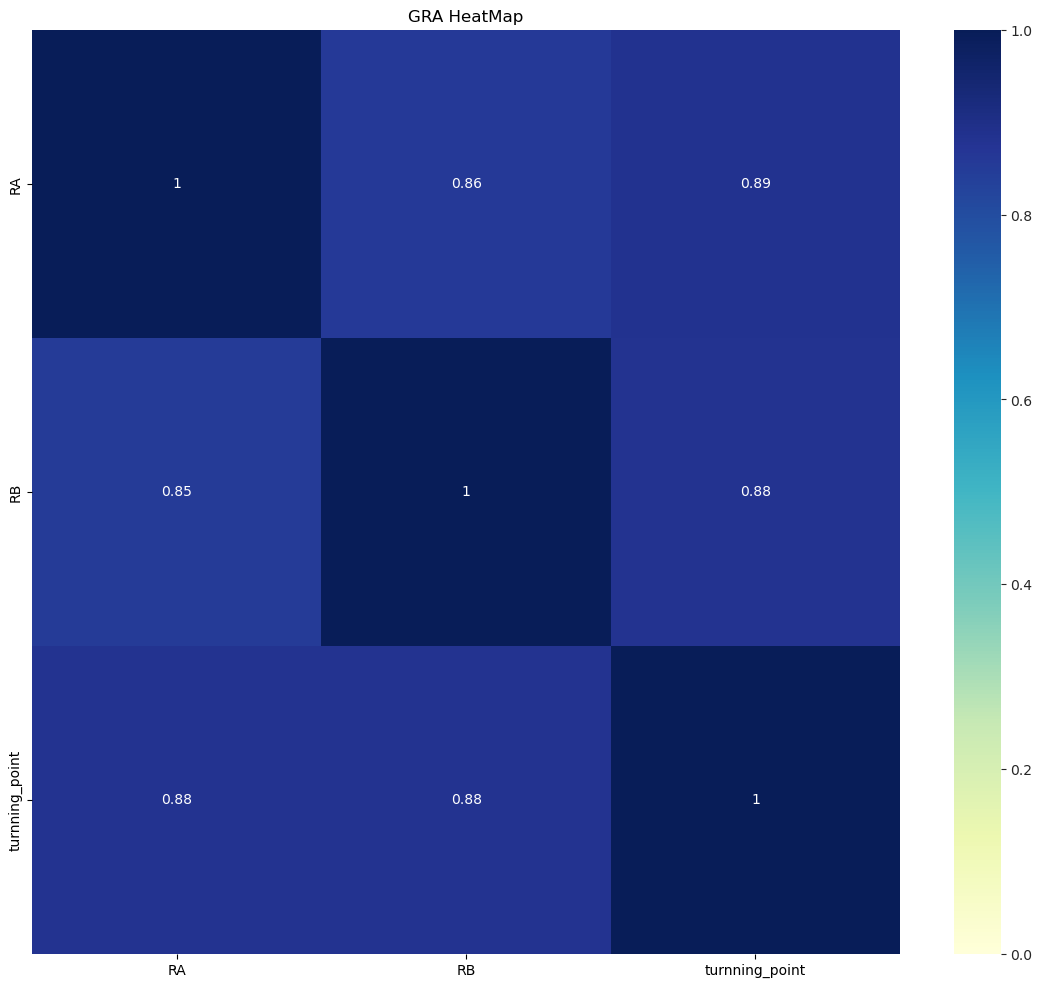

In [22]:
# 灰色关联结果矩阵可视化
import seaborn as sns

def ShowGRAHeatMap(DataFrame):
    colormap = plt.cm.RdBu
    ylabels = DataFrame.columns.values.tolist()
    print( DataFrame.columns.values.tolist())
    f, ax = plt.subplots(figsize=(14, 12))
    ax.set_title('GRA HeatMap')
    
    # 设置展示一半，如果不需要注释掉mask即可
#     mask = np.zeros_like(DataFrame)
#     mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        print(sns.axes_style)
        sns.heatmap(DataFrame,
                    cmap="YlGnBu",
                    annot=True,
                    vmin=0,vmax=1
#                     mask=mask,
                   )
    plt.show()

ShowGRAHeatMap(data_gra)

## 代码运算性能对比
一段来至于其他博客的纯pd代码，主要用于对比性能。测试这个纯pd确实比我的np为主的代码慢很多。

In [7]:
import pandas as pd
# x=pd.read_excel('data.xlsx')
# x=x.iloc[:,1:].T

x = wine.T
import time
t1= time.time()
# 1、数据均值化处理
x_mean=x.mean(axis=1)
for i in range(x.index.size):
    x.iloc[i,:] = x.iloc[i,:]/x_mean[i]

# 2、提取参考队列和比较队列
ck=x.iloc[0,:]
cp=x.iloc[1:,:]

# 比较队列与参考队列相减
t=pd.DataFrame()
for j in range(cp.index.size):
    temp=pd.Series(cp.iloc[j,:]-ck)
    t=t.append(temp,ignore_index=True)

#求最大差和最小差
mmax=t.abs().max().max()
mmin=t.abs().min().min()
rho=0.5
#3、求关联系数
ksi=((mmin+rho*mmax)/(abs(t)+rho*mmax))


#4、求关联度
r=ksi.sum(axis=1)/ksi.columns.size
t2= time.time()
print(t2-t1)
#5、关联度排序，得到结果r3>r2>r1
result=r.sort_values(ascending=False)

NameError: name 'wine' is not defined

In [ ]:
r,mmax,mmin

## 参考文章
1. [百度百科 灰色关联分析法](https://baike.baidu.com/item/%E7%81%B0%E8%89%B2%E5%85%B3%E8%81%94%E5%88%86%E6%9E%90%E6%B3%95/8602076?fr=aladdin)
2. [简书 Python实现灰色关联](https://www.jianshu.com/p/7f9325551348)